# Data
Data byla ztažena z tohoto:
[Data-Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_train.csv) <br>
Soubor byl moc velký, takže ho nemohu poslat mailem

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mnist_train.csv')
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


784 neuronů na vstupu odpovídá 28x28 pixelů.Potom jeden skrytý layer a výstupní layer
má 10 neuronů, jeden neuron pro každé číslo.

![title](network.png)

In [52]:
data = np.array(data) #převod na numpy array
m, n = data.shape

#Data rozděluji na dvě množiny, testovací a trénovací
data_test = data[0:1000].T
#Transpozici provádím, aby každý sloupec byl jeden příklad
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
#Data ještě dělím 255
#Zaprvé kvůli tomu, že čistě bílý spot je definován jako 255,
#takže takhle bude jako 1 a bude to kvůli pravděpodobnostem lepší
#A také když to neudělám, přeteče mi funkce softmax, protože tam budou velká čísla
print(Y_train.shape)
print(X_train.shape)
#Zkontroluju dimenze, že sedí

(59000,)
(784, 59000)


Každý výstupní neuron je popsán jako
$$Z_1 = x_1 \cdot w_{11} + x_2 \cdot w_{12} + \cdots x_i \cdot w_{1i} + b_1$$
$$\vdots$$
$$Z_j = x_1 \cdot w_{j1} + x_2 \cdot w_{j2} + \cdots x_i \cdot w_{ji} + b_j$$
Toto pak můžeme převést jako matice na
$$Z = W \cdot X + B$$

In [53]:
#Definuju matice vah a biasů a jejich dimenze
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    #To, že odčítám 0.5 je další faktor, aby mi nepřetekla funkce softmax
    return W1, b1, W2, b2

Propagace dopředu vypadá následovně
$$Z_1 = W_1 \cdot X_1 + B_1$$
$X_1$ je vstup do síťe, neboli těch 784 pixelů, 
to pak ženu přes aktivační funkci. Důvod je, že kdyby tam aktivační funkce nebyla, 
bylo by to celý jen lineární kombinace, což nechceme. Aktivační funkce v tomto případě
je ReLU, která je definovaná dále
$$A_1 = relu(Z_1)$$
Toto pak opakuji i pro další layer
$$Z_2 = W_2 \cdot A_1 + B_2$$
Druhá aktivační funkce je softmax. To je perfektní jako finální aktivační funkce této síťě,
protože její výstup je vlastně distribuční funkce.
$$A_2 = softmax(Z_2)$$

In [54]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    #Poznámka: další řešení jak zabránit přetečení softmax je X - softmax(Z2)
    return Z1, A1, Z2, A2

Rectified Linear Unit
\begin{equation}
ReLU(x) = 
\begin{cases} 
    0 & x\leq 0 \\
    x & x > 0
\end{cases}
\end{equation}


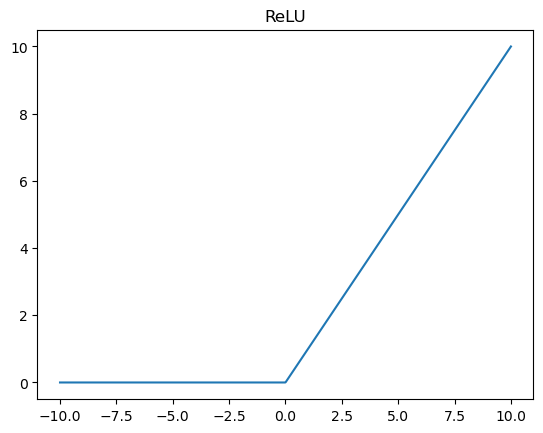

In [55]:


x = np.linspace(-10, 10, 1000)
plt.title('ReLU')
plt.plot(x, np.maximum(x, 0))

Softmax
$$softmax(x_i) = \frac{e^{x_i}}{\Sigma_{j=1}^n e^{x_j}}$$

In [56]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    e = np.exp(x)
    return np.divide(e, np.sum(e, axis=0))

#Derivaje ReLU, potřebné později
def relu_prime(x):
    return x > 0

Ještě než začneme počítat chybovou funkci, potřebujeme převést předpokládaný výstup na matici výstupů. Neboli
\begin{equation}
4 \to
\begin{bmatrix}
0\\
0\\
0\\
1\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}
\end{equation}
Toto udělá funkce numtomat

In [57]:
def numtomat(Y):
    Y_mat = np.zeros((Y.size, 10))
    Y_mat[np.arange(Y.size), Y] = 1
    Y_mat = Y_mat.T
    return Y_mat

Pomocí chybové funkce (Cost function), zjistíme, jak moc je hodnota vypočítaná pomocí neuronové
sítě daleko od správné hodnoty
$$C = \frac{1}{m} \Sigma_i^m (Y - A_2)^2$$
Teď se musí zjistit, jak moc máme měnit hodnoty $W_1, B_1, W_2, B_2$ k chybové funkci.
Derivace chybové funkce podle $A_2$ je
$$\frac{\partial C}{\partial A_2} = \frac{2}{m} (A_2 - Y)$$
to potřebujeme protože budeme určovat její změnu podle proměných, které chceme změnit

# Propagace zpátky
## dW2

Využijeme toho, že chybová funkce je složená funkce
$$C \circ A_2 \circ Z_2 (W_2, B_2, A_1)$$
a tak dál. Zjistíme teda, jak se mění $W_2$:
$$\frac{\partial C}{\partial W_2} = \frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2} \frac{\partial Z_2}{\partial W_2}$$
Derivace $$\frac{\partial A_2}{\partial Z_2}$$ je derivace aktivační funkce softmax, kterou budu brát jako jedničku.
<hr>
Obecně tedy napíšeme (indexy jsou značí něco jiného, než značili předtím)
$$\frac{\partial C}{\partial W} = 
\begin{bmatrix}
\frac{\partial C}{\partial W_{11}} & \frac{\partial C}{\partial W_{12}} & \cdots & \frac{\partial C}{\partial W_{1i}}\\
\vdots\\
\frac{\partial C}{\partial W_{j1}} & \frac{\partial C}{\partial W_{j2}} & \cdots & \frac{\partial C}{\partial W_{ji}}\\
\end{bmatrix}
$$
Z rovnic vypsané úplně nahoře se zjistí
$$\frac{\partial Z}{\partial W_{ij}} = x_i$$
$$
\frac{\partial C}{\partial W} = 
\begin{bmatrix}
\frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1}x_1 &
\cdots & \frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1}x_i\\
\vdots\\
\frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j}x_1 & \cdots &
\frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j}x_i\\
\end{bmatrix}
$$
<hr>
Dospějeme tedy k výsledku (už ne obecný):
$$\frac{\partial Z_2}{\partial W_2} = A_1^T$$
$$\frac{\partial C}{\partial W_2} = \frac{2}{m} (A_2 - Y) \cdot A_1^T$$

## dB2

A i pro $B_2$:
$$\frac{\partial C}{\partial B_2} = \frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2} \frac{\partial Z_2}{\partial B_2}$$
Což je uplně stejné až na poslední člen kde
$$\frac{\partial Z_2}{\partial B_2} = E$$
kde $E$ je jednotková matice, takže
$$\frac{\partial C}{\partial B_2} = \frac{2}{m} (A_2 - Y)$$

## dA1

Dále $W_1$ a $B_1$, což bude podobné jako před, ale musíme zohlednit všechny body, kterým zpáteční propagace prošla
$$\frac{\partial C}{\partial W_1} = \frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2} \frac{\partial Z_2}{\partial A_1}
\frac{\partial A_1}{\partial Z_1} \frac{\partial Z_1}{\partial W_1}$$
Takže nejdřív jen první část, což je:
$$\frac{\partial C}{\partial A_1} = \frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2} \frac{\partial Z_2}{\partial A_1}$$
<hr>
Obecně tedy: (indexy jsou značí něco jiného, než značili předtím, používám jen matici $A$ namísto $A_1$ např.)
$$\frac{\partial C}{\partial A} = 
\begin{bmatrix}
\frac{\partial C}{\partial A_1}\\
\frac{\partial C}{\partial A_2}\\
\vdots\\
\frac{\partial C}{\partial A_i}\\\\
\end{bmatrix} = 
\frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1}w_{11} +
\frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2}w_{21} + \cdots +
\frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j}w_{j1} =
\begin{bmatrix}
\frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1} w_{11} + \cdots + \frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j} w_{j1}\\
\vdots\\
\frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1}w_{1i} + \cdots + \frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j}w_{ji}\\
\end{bmatrix}$$
$$\frac{\partial C}{\partial A} = 
\begin{bmatrix}
w_{11} & w_{21} & \cdots & w_{j1}\\
w_{12} & w_{22} & \cdots & w_{j2}\\
\vdots\\
w_{1i} & w_{2i} & \cdots & w_{ji}\\
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{\partial C}{\partial A_1} \frac{\partial A_1}{\partial Z_1}\\
\frac{\partial C}{\partial A_2} \frac{\partial A_2}{\partial Z_2}\\
\vdots\\
\frac{\partial C}{\partial A_j} \frac{\partial A_j}{\partial Z_j}\\
\end{bmatrix}$$
<hr>

## dW1 a dB1

Takže náš případ (obecnost zkončila)
$$\frac{\partial C}{\partial A_1} = W_2^T \cdot \frac{2}{m} (A_2 - Y) \cdot relu'(Z_1)$$
relu je aktivační funkce při přechodu z 1. do 2. layeru (inputová je 0.).
Druhá část tedy bude podobná jako předtím:
$$\frac{\partial A_1}{\partial Z_1} \frac{\partial Z_1}{\partial W_1} = X^T$$
Nemáme ale derivaci chybové funkce. $X$ je v tomto případě input do neuralní sítě (0. layer).
Takže celé to je:
$$\frac{\partial C}{\partial W_1} = W_2^T \cdot \frac{2}{m} (A_2 - Y) \cdot relu'(Z_1) \cdot X^T$$
Podobně bude i $B_1$. To předtím vyšlo jako 1:
$$\frac{\partial C}{\partial B_1} = W_2^T \cdot \frac{2}{m} (A_2 - Y) \cdot relu'(Z_1)$$

In [58]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    Y_mat = numtomat(Y)
    dW2 = 2/m * (A2-Y_mat).dot(A1.T)
    db2 = 2/m * (A2-Y_mat)
    dZ1 = W2.T.dot(A2-Y_mat) * relu_prime(Z1)
    dW1 = 2/m * (dZ1).dot(X.T)
    db1 = 1 / m * dZ1
    return dW1, db1, dW2, db2

In [61]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [1]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2
        
        if i % 5 == 0:
            print("Iteration: ", i)
            predictions = np.argmax(A2, 0) #jaké číslo jsme předpověděli
            accuracy = np.sum(predictions==Y)/Y.size #kolik toho bylo celkem správně z celého datasetu
            print("accuracy:", accuracy*100, "%")
    return W1, b1, W2, b2

In [76]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 200)

Iteration:  0
accuracy: 8.561016949152542 %
Iteration:  5
accuracy: 15.96779661016949 %
Iteration:  10
accuracy: 28.93728813559322 %
Iteration:  15
accuracy: 38.37118644067797 %
Iteration:  20
accuracy: 45.257627118644066 %
Iteration:  25
accuracy: 51.22881355932203 %
Iteration:  30
accuracy: 56.19661016949152 %
Iteration:  35
accuracy: 60.228813559322035 %
Iteration:  40
accuracy: 63.26271186440678 %
Iteration:  45
accuracy: 65.59661016949153 %
Iteration:  50
accuracy: 67.49830508474575 %
Iteration:  55
accuracy: 69.16101694915254 %
Iteration:  60
accuracy: 70.60338983050848 %
Iteration:  65
accuracy: 71.85254237288136 %
Iteration:  70
accuracy: 72.86101694915254 %
Iteration:  75
accuracy: 73.8 %
Iteration:  80
accuracy: 74.61186440677966 %
Iteration:  85
accuracy: 75.31864406779661 %
Iteration:  90
accuracy: 76.03728813559322 %
Iteration:  95
accuracy: 76.72203389830509 %
Iteration:  100
accuracy: 77.31864406779661 %
Iteration:  105
accuracy: 77.89830508474577 %
Iteration:  110
accur

In [97]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)
    return predictions[0]

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def accuracy_of_test_set(W1, b1, W2, b2):
    a = 0
    for i in range(1000):
        current_image = X_test[:, i, None]
        prediction = make_predictions(X_test[:, i, None], W1, b1, W2, b2)
        label = Y_test[i]
        if(label==prediction):
            a += 1
        #####
    print("accuracy of test set is", (a/1000)*100, "%")

Prediction:  7
Label:  7


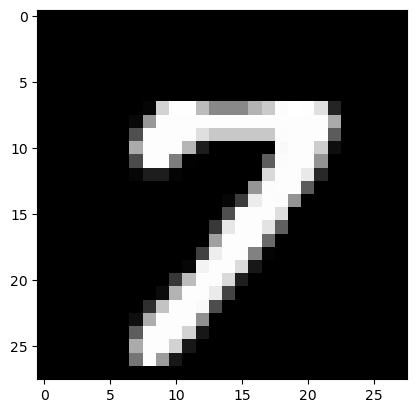

In [89]:
test_prediction(np.random.randint(1000), W1, b1, W2, b2)

In [98]:
accuracy_of_test_set(W1, b1, W2, b2)

accuracy of test set is 83.5 %


# Zdroje
[Na skript](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras) <br>
[Na matematický model](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65)